Name: Anand Sekar

netID: anand272

Date: 4/7/2020

#CSE 490W Wireless Communication
##Homework 1
###Due before class, Wednesday April 8

Collaboration etc: it is fine to discuss problems with classmates. Each person must write and turn in their own code. It is also OK to re-use code from the Notebooks I provide. Please select Save a Copy in Drive (or in Github) and then insert your answers into your copy of the Collab notebook. We will ask you to provide the link to your answers (TBD how we will ask you to provide that link). When you are asked to provide a value in dB (or dBm etc), please give an integer dB value...no need to write something like 33.1 dB. Please round sensibly: if your answer is that the signal needs to be at least 10.1 dB, then you should round up to 11dB.

***Question 1a***

Model the propagation of three 915MHz rays, one direct from Tx to Rx, one that bounces off the floor, and one that bounces off the ceiling. Sweep the distance between Tx and Rx from 0 to 10m, and ***plot the magnitude of the signal that results when the three beams add at the receiver***, for each receiver distance. Assume that angle of incidence == angle of reflection for both floor and ceiling, which implies that the bounce point is at the mid-point between Tx and Rx for both the floor bounce and the ceiling bounce. Ignore any polarization effects in your answer.

***Question 1b*** 

The floor and ceiling are made of different materials. Reflections can sometimes change the phase of the reflected signal. Suppose that the bounce off the floor causes a 180 degree phase shift, and the bounce off the ceiling does not cause any phase shift (which is how we've been modeling the reflections so far). ***Plot the magnitude of the sum of the three beams, now including the 180 degree phase shift for the floor-bounce beam, as the TX-RX distance is swept from 0 to 10m.*** As in part 1a, you should ignore polarization effects. (In general, reflections can cause changes in polarization and phase changes; here I am asking you to consider a very simple and specific phase change caused by the reflection off the floor. This is a bit simpler than actual polarization effects.)
![picture](https://gitlab.cs.washington.edu/jrs/cse490w/raw/master/ThreeBeamPropagation.png)

In [0]:
#1a
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
# Model a propagating wave
x=np.linspace(0,10,1000) # 0 to 10 meters, 1000 steps
freq = 915e6 # 915MHz ...     in cycles / s
c = 3.00e8   # speed of light in    m / s
wl = c/freq  # wavelength
pi = np.pi
rad2deg = 180.0/pi
deg2rad = pi/180.0

In [0]:
compamp = np.exp(1j*2*pi*(x/wl)) # complex amplitude
h = 1 # height of tx and rx above floor
floor = 0 # height of floor 
ceiling = 3 # height of ceiling

# x represents the position of the RCV...we are sweeping it
bouncex = x/2.0 # mid-point of floor / ceil...this is where bounce will happen


# Bounce_floor
Ttobounce_floor = np.sqrt((h-floor)**2 + bouncex**2)
Rfrombounce_floor = np.sqrt((x-bouncex)**2 + (h-floor)**2)
TbounceR_floor = Ttobounce_floor + Rfrombounce_floor
compampbounce_floor = np.exp(1j*2*pi*(TbounceR_floor/wl))


# Bounce_ceiling
Ttobounce_ceiling = np.sqrt((ceiling - h)**2 + bouncex**2)
Rfrombounce_ceiling = np.sqrt((x-bouncex)**2 + (ceiling - h)**2)
TbounceR_ceiling = Ttobounce_ceiling + Rfrombounce_ceiling
compampbounce_ceiling = np.exp(1j*2*pi*(TbounceR_ceiling/wl))

resultantamp = compamp + compampbounce_floor + compampbounce_ceiling
resultantmag = np.abs(resultantamp)

Text(0, 0.5, 'Magnitude of sum')

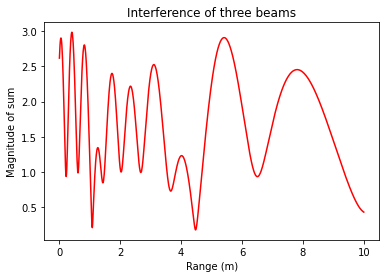

In [3]:
# Plotting the magnitude of the sum of the three beams
plt.figure()
plt.plot(x, resultantmag,'r')
plt.title("Interference of three beams")
plt.xlabel("Range (m)")
plt.ylabel("Magnitude of sum")

Text(0, 0.5, 'Magnitude of sum')

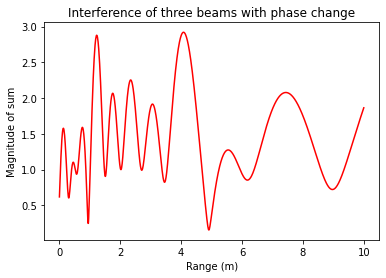

In [4]:
#1b
compampbounce_floor = np.exp(1j*2*pi*((TbounceR_floor/wl)) + 1j*pi)

resultantamp = compamp + compampbounce_floor + compampbounce_ceiling
resultantmag = np.abs(resultantamp)

# Plotting the magnitude of the sum of the three beams
plt.figure()
plt.plot(x, resultantmag,'r')
plt.title("Interference of three beams with phase change")
plt.xlabel("Range (m)")
plt.ylabel("Magnitude of sum")

***Question 2*** Moonbounce. In [Earth-Moon-Earth communication](https://en.wikipedia.org/wiki/Earth%E2%80%93Moon%E2%80%93Earth_communication), 
radio operators far away from one another on Earth can communicate by bouncing their radio signals off the moon. Suppose you want to communicate with your ham radio pal using EME communication on the 2m band (i.e. wavelength is 2m). 

***2a*** ***What frequency is the 2m band?*** 

***2b*** The Moon is on average 384,000 km from the earth. ***What is the total path loss in dB*** for the propagation from the Earth to the Moon, and from the Moon back to the Earth, ignoring losses to absorbtion, and any other losses.  For this part of the question, we are not thinking about the antennas on both sides, or the TX power, or what happens when the signal bounces off the moon (for now assume all of the signal is reflected)---the question is just how much loss is there due to propagation over the long distances.

***2c*** A new-fangled LoRa radio system can receive signals successfully if it receives a signal of at least -130dBm. Suppose you have a 30dBi dish antenna on the TX side, and a 30dBi antenna on the RX side. 7 percent of the signal that hits the moon is reflected---the rest is lost to absorbtion. You also lose 50dB of signal due to the Moon's angular cross section---a bunch of your signal simply misses the moon, since your TX beam ends up being a lot bigger than the moon. ***In order to receive -130dBm, how much power does you transmitter need to send? Please give the answer in dBm, in dBW, and in Watts.*** Please round to an integer value of dB.

## Question 2 Answers:

###(a)
The frequency of the 2m band is  $f = \frac{c}{\lambda} = \frac{c}{2} \approx 149,896,229 Hz = 1.5 * 10^8 Hz = 150 MHz$.

###(b)
The total path loss is $20log(\frac{2}{4\pi(384000 * 10^3 * 2)}) \approx -194 dB$. 
###(c)
First, we need to find out how much power is received by the Moon, which will be how much power is transmitted back to Earth. 

$P_r = P_t + 30 dBi + 30 dBi + 20log(\frac{2}{4\pi(384000 * 10^3)}) -  50 dB + 10log(0.07)$

Then, we substitute this expression - the power received by the Moon - into this new $P_t$ - the power transmitted from the Moon to the Earth

$-130 = (P_t + 30 dBi + 30 dBi + 20log(\frac{2}{4\pi(384000 * 10^3)}) -  50 dB + 10log(0.07)) + 30 dBi + 30 dBi + 20log(\frac{2}{4\pi(384000 * 10^3)})$

Solving for $P_t$, we get $P_t = 186.85 dBm \approx 187 dBm$. 

This is also equal to $156.85dBW \approx 157 dBW$ and $4.84 * 10^{15} W$. 



